<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


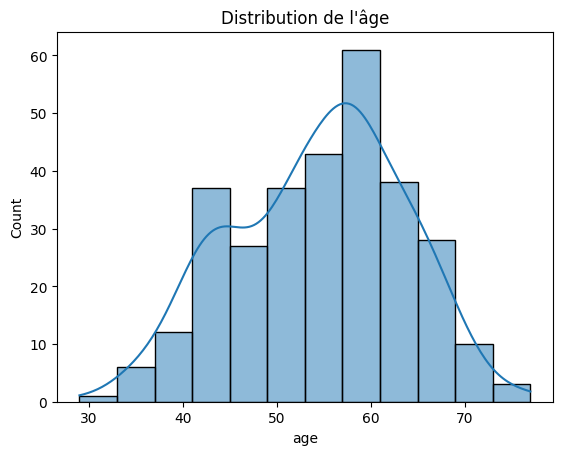

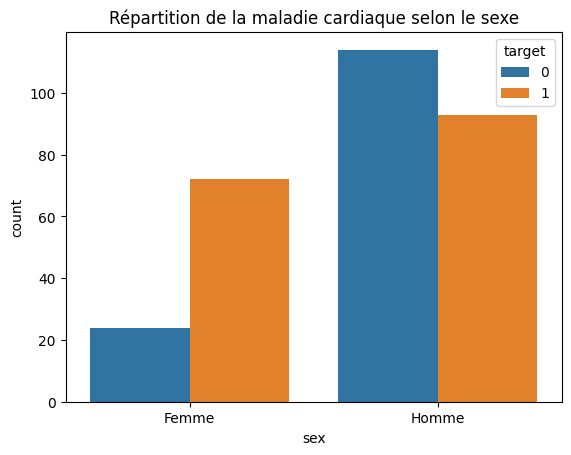

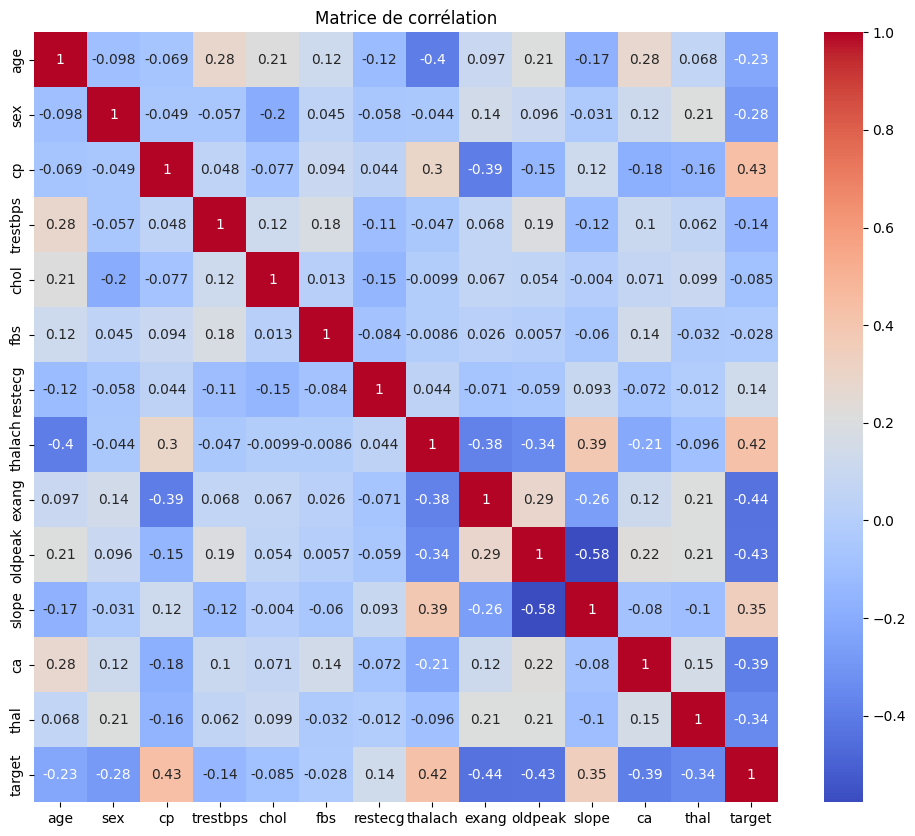

==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix :
 [[25  4]
 [ 5 27]]


==== KNN ====
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix :
 [[27  2]
 [ 3 29]]


==== SVM ====
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.8

['scaler.pkl']

In [17]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Évaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# Sauvegarde modèle
import joblib

df = pd.read_csv("heart.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()


# Distribution de l'âge
sns.histplot(df['age'], kde=True)
plt.title("Distribution de l'âge")
plt.show()

# Maladie cardiaque par sexe
sns.countplot(x='sex', hue='target', data=df)
plt.title("Répartition de la maladie cardiaque selon le sexe")
plt.xticks([0, 1], ['Femme', 'Homme'])
plt.show()

# Corrélation entre les variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




# Dictionnaire des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = []

for name, model in models.items():
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Évaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0
    
    results.append({
        "Modèle": name,
        "Accuracy": acc,
        "Précision": prec,
        "Rappel": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })
    
    print(f"==== {name} ====")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Affichage des résultats
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-Score", ascending=False)
    
# Exemple avec RandomForest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

joblib.dump(best_model, "meilleur_modele.pkl")
joblib.dump(scaler, "scaler.pkl")  # Pour l'utiliser aussi dans Streamlit

    
# # Affichage sous forme de DataFrame
# results_df = pd.DataFrame(results)
# results_df.sort_values(by="F1-Score", ascending=False)

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# sns.barplot(x="F1-Score", y="Modèle", data=results_df.sort_values(by="F1-Score", ascending=False))
# plt.title("Comparaison des modèles selon le F1-Score")
# plt.show()